In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

dta = pd.read_csv("~/DATA_1030/Final_Project/Final_Datasets/not_preprocessed.csv")
import pandas as pd
import numpy as np
# The following three also have confidence columns in the datasets
# Study 1c: Study on 50 U.S. states. state - name of the state, city - name of the city asked
# Every state is asked with it's true capital
study_1c = pd.read_csv('~/DATA_1030/Final_Project/crowd_wisdom_data/study1c.csv')
# Study 2: Trivia. qname - the topic of the trivia question (39 participants, 80 unique qnames)
study_2 = pd.read_csv('~/DATA_1030/Final_Project/crowd_wisdom_data/study2.csv')
# Study 3: Dermatologists diagnosing lesions as malignant or benign
study_3 = pd.read_csv('~/DATA_1030/Final_Project/crowd_wisdom_data/study3.csv')

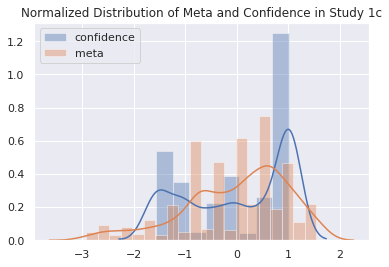

In [33]:
s_scaler = StandardScaler()
sns.set_style('darkgrid')
sns.distplot(s_scaler.fit_transform(study_1c[['confidence']]))
sns.distplot(s_scaler.fit_transform(study_1c[['meta']]))
plt.title('Normalized Distribution of Meta and Confidence in Study 1c')
plt.legend(("confidence", "meta"))
plt.show()

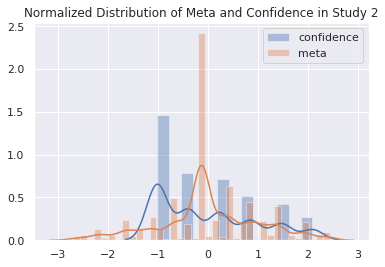

In [34]:
plt.clf()
sns.distplot(s_scaler.fit_transform(study_2[['confidence']]))
sns.distplot(s_scaler.fit_transform(study_2[['meta']]))
plt.title('Normalized Distribution of Meta and Confidence in Study 2')
plt.legend(("confidence", "meta"))
plt.show()

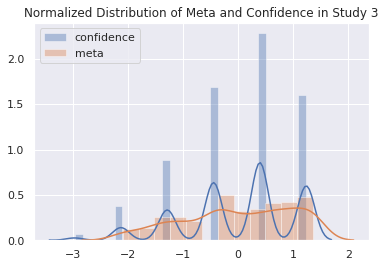

In [35]:
plt.clf()
sns.distplot(s_scaler.fit_transform(study_3[['confidence']]))
sns.distplot(s_scaler.fit_transform(study_3[['meta']]))
plt.title('Normalized Distribution of Meta and Confidence in Study 3')
plt.legend(("confidence", "meta"))
plt.show()

In [36]:
import numpy as np
study_1c["correct_response"] = np.where(study_1c['own'] == study_1c['actual'], 1, 0)
study_2["correct_response"] = np.where(study_2['own'] == study_2['actual'], 1, 0)
study_3["correct_response"] = np.where(study_3['own'] == study_3['actual'], 1, 0)

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ValueError: zero-size array to reduction operation minimum which has no identity

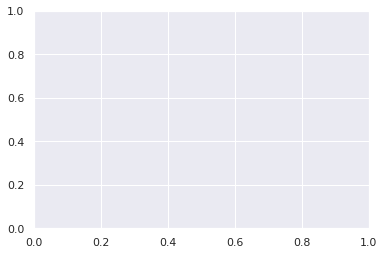

In [37]:
plt.clf()
dataset = [study_1c[study_1c['correct_response']=='correct']['confidence'].values,
           study_1c[study_1c['correct_response']=='not correct']['confidence'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Correct Response','Inorrect Response'])
plt.ylabel('Confidence')
plt.title('Confidence Distribution for Correct and Incorrect Response in Study 1c')
plt.show()

In [ ]:
plt.clf()
dataset = [study_1c[study_1c['correct_response']=='correct']['meta'].values,
           study_1c[study_1c['correct_response']=='not correct']['meta'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Correct Response','Inorrect Response'])
plt.ylabel('Meta')
plt.title('Meta Distribution for Correct and Incorrect Response in Study 1c')
plt.show()

In [ ]:
plt.clf()
dataset = [study_2[study_2['correct_response']=='correct']['confidence'].values,
           study_2[study_2['correct_response']=='not correct']['confidence'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Correct Response','Inorrect Response'])
plt.ylabel('Confidence')
plt.title('Confidence Distribution for Correct and Incorrect Response in Study 2')
plt.show()

In [ ]:
plt.clf()
dataset = [study_2[study_2['correct_response']=='correct']['meta'].values,
           study_2[study_2['correct_response']=='not correct']['meta'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Correct Response','Inorrect Response'])
plt.ylabel('Meta')
plt.title('Meta Distribution for Correct and Incorrect Response in Study 2')
plt.show()

In [ ]:
plt.clf()
dataset = [study_3[study_3['correct_response']=='correct']['confidence'].values,
           study_3[study_3['correct_response']=='not correct']['confidence'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Correct Response','Inorrect Response'])
plt.ylabel('Confidence')
plt.title('Confidence Distribution for Correct and Incorrect Response in Study 3')
plt.show()

In [ ]:
plt.clf()
dataset = [study_3[study_3['correct_response']=='correct']['meta'].values,
           study_3[study_3['correct_response']=='not correct']['meta'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],['Correct Response','Inorrect Response'])
plt.ylabel('Meta')
plt.title('Meta Distribution for Correct and Incorrect Response in Study 3')
plt.show()

In [38]:
# for i in dta.columns:
#     print(i)
conf_meta = dta.columns[1:31]
d = dta[conf_meta]

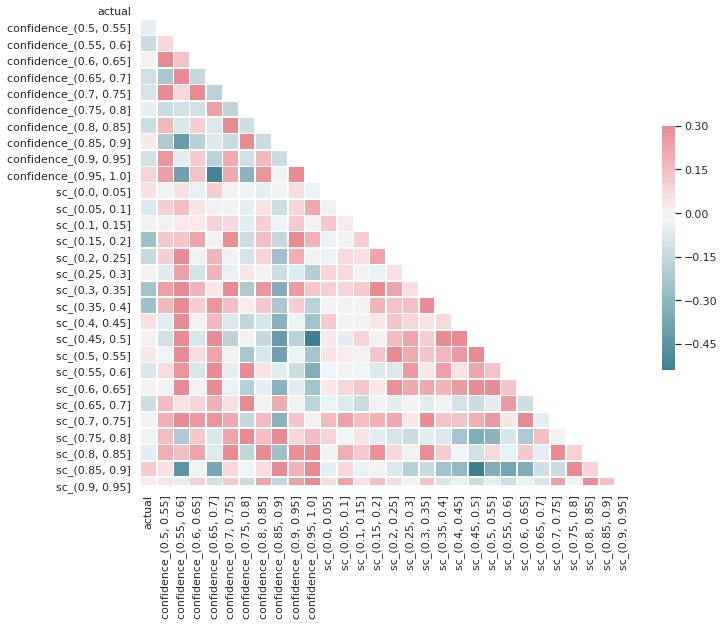

In [39]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [40]:
study_1c = study_1c.groupby(['meta','confidence']).sum().reset_index().rename(columns={0:'count'})
study_1c = study_1c.drop(["own", "actual"], axis=1)
study_2 = study_2.groupby(['meta','confidence']).sum().reset_index().rename(columns={0:'count'})
study_2 = study_2.drop(["own", "actual"], axis=1)
study_3 = study_3.groupby(['meta','confidence']).sum().reset_index().rename(columns={0:'count'})
study_3 = study_3.drop(["own", "actual"], axis=1)

In [41]:
meta = study_1c["meta"].unique()
confidence = study_1c["confidence"].unique()

In [42]:
study_1c = study_1c.pivot(index='meta', columns='confidence', values='correct_response')

In [43]:
dols = (study_1c, study_2, study_3)
new_df = pd.concat(dols)
new_df = new_df.groupby(['meta','confidence']).sum().reset_index()
new_df.to_csv("new_df.csv")

NameError: name 'df' is not defined

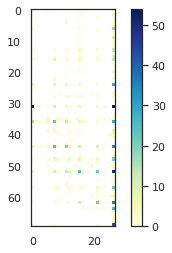

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
 
plt.imshow(study_1c, cmap="YlGnBu")
plt.colorbar()
plt.xticks(range(len(df)),df.columns, rotation=20)
plt.yticks(range(len(df)),df.index)
plt.show()